# importing all necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the training dataset and separating features and reponse.

In [92]:
prices_train = pd.read_csv("D:\intern project\machineHack\Predicting-House-Prices-In-Bengaluru-Train-Data.csv")

In [4]:
prices_train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
prices_train.shape

(13320, 9)

In [6]:
prices_train.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
X = prices_train.drop('price',axis=1)

In [8]:
y_true = prices_train['price']

In [9]:
X.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0


In [10]:
y_true.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [11]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0


# Data Cleaning

# Total_sqft cleaned

In [12]:
ch = ['-','S','P','A','G','C']
sam = X['total_sqft']
for i in ch:
    sam = sam.apply(lambda x: (x.split(i)))
    sam = sam.apply(lambda x: x[0])
    
X['total_sqft'] = (sam.apply(lambda x: pd.to_numeric(x)))

## visualizing the initial dataset.

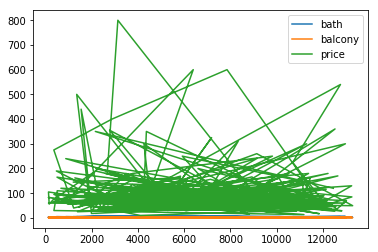

In [13]:
prices_train.sample(250).plot()

# scaling the features

In [16]:
col_to_norm = ['total_sqft', 'bath', 'balcony']

In [29]:
X[col_to_norm] = X[col_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [56]:
X.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,0.020183,0.025641,0.333333
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,0.049722,0.102564,1.000000
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,0.027530,0.025641,1.000000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,0.029079,0.051282,0.333333
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,0.022938,0.025641,0.333333


In [69]:
(pd.isna(X)).sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
dtype: int64

In [68]:
X["location"].fillna(" ", inplace = True)
X["size"].fillna(" ", inplace = True)
X["society"].fillna(" ", inplace = True)
X["bath"].fillna((X['bath'].mean()), inplace = True)
X["balcony"].fillna((X['balcony'].mean()), inplace = True)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=18)

In [72]:
X_test.shape

(3996, 8)

In [73]:
area_type = tf.feature_column.categorical_column_with_hash_bucket('area_type',hash_bucket_size=10)
availability = tf.feature_column.categorical_column_with_hash_bucket('availability',hash_bucket_size=10000)
location = tf.feature_column.categorical_column_with_hash_bucket('location',hash_bucket_size=100000)
size = tf.feature_column.categorical_column_with_hash_bucket('size',hash_bucket_size=100)
society = tf.feature_column.categorical_column_with_hash_bucket('society',hash_bucket_size=100000)
total_sqft = tf.feature_column.numeric_column('total_sqft')
bath = tf.feature_column.numeric_column('bath')
balcony = tf.feature_column.numeric_column('balcony')

In [74]:
feat_cols = [area_type,availability,location,size,society,total_sqft,bath,balcony]

In [75]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [76]:
#model = tf.estimator.DNNRegressor(hidden_units=[8,8,8],feature_columns=feat_cols)
model = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Chas\\AppData\\Local\\Temp\\tmp5ddcu84z', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [78]:
model.train(input_fn=input_func,steps = 10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\Chas\AppData\Local\Temp\tmp5ddcu84z\model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into C:\Users\Chas\AppData\Local\Temp\tmp5ddcu84z\model.ckpt.
INFO:tensorflow:loss = 24995.316, step = 1001
INFO:tensorflow:global_step/sec: 64.2637
INFO:tensorflow:loss = 37305.89, step = 1101 (1.566 sec)
INFO:tensorflow:global_step/sec: 71.5779
INFO:tensorflow:loss = 113089.31, step = 1201 (1.412 sec)
INFO:tensorflow:global_step/sec: 74.1797
INFO:tensorflow:loss = 212193.4, step = 1301 (1.327 sec)
INFO:tensorflow:global_step/sec: 68.5362
INFO:tensorflow:loss = 12946.379, step = 1401 (1.472 sec)
INFO:tensorflow:global_step/sec: 72.3548
INFO:tensorflow:loss = 150808.45, step = 1501 (1.389 sec)
INFO:tensorflow:global_step/sec: 75.4105
INFO:tensorflow:loss = 273685.2, step = 1601 (1.361 sec)
INFO:tensorflow:global_step/sec: 62.3795
INFO:tensorflow:loss = 129549.47, step = 1701 (1.583 sec)
INFO:tensor

INFO:tensorflow:loss = 62528.184, step = 9101 (2.015 sec)
INFO:tensorflow:global_step/sec: 57.0093
INFO:tensorflow:loss = 339845.28, step = 9201 (1.751 sec)
INFO:tensorflow:global_step/sec: 52.7953
INFO:tensorflow:loss = 46145.79, step = 9301 (1.901 sec)
INFO:tensorflow:global_step/sec: 82.914
INFO:tensorflow:loss = 32817.54, step = 9401 (1.208 sec)
INFO:tensorflow:global_step/sec: 69.1523
INFO:tensorflow:loss = 29134.453, step = 9501 (1.430 sec)
INFO:tensorflow:global_step/sec: 74.79
INFO:tensorflow:loss = 29464.738, step = 9601 (1.344 sec)
INFO:tensorflow:global_step/sec: 77.1561
INFO:tensorflow:loss = 18213.812, step = 9701 (1.314 sec)
INFO:tensorflow:global_step/sec: 66.8411
INFO:tensorflow:loss = 58130.168, step = 9801 (1.481 sec)
INFO:tensorflow:global_step/sec: 74.6226
INFO:tensorflow:loss = 25872.125, step = 9901 (1.362 sec)
INFO:tensorflow:global_step/sec: 57.107
INFO:tensorflow:loss = 19584.686, step = 10001 (1.729 sec)
INFO:tensorflow:global_step/sec: 65.613
INFO:tensorflow:

## prediction to find rmse

In [ ]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [80]:
pred_gen = model.predict(predict_input_func)

In [81]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from C:\Users\Chas\AppData\Local\Temp\tmp5ddcu84z\model.ckpt-11000


In [82]:
predictions

[{'predictions': array([99.202484], dtype=float32)},
 {'predictions': array([84.88566], dtype=float32)},
 {'predictions': array([75.12883], dtype=float32)},
 {'predictions': array([111.210335], dtype=float32)},
 {'predictions': array([89.78044], dtype=float32)},
 {'predictions': array([92.69297], dtype=float32)},
 {'predictions': array([110.900085], dtype=float32)},
 {'predictions': array([68.83819], dtype=float32)},
 {'predictions': array([57.65644], dtype=float32)},
 {'predictions': array([84.341225], dtype=float32)},
 {'predictions': array([103.002106], dtype=float32)},
 {'predictions': array([71.77091], dtype=float32)},
 {'predictions': array([87.772095], dtype=float32)},
 {'predictions': array([110.22262], dtype=float32)},
 {'predictions': array([116.749275], dtype=float32)},
 {'predictions': array([95.945435], dtype=float32)},
 {'predictions': array([118.87298], dtype=float32)},
 {'predictions': array([120.939445], dtype=float32)},
 {'predictions': array([99.7107], dtype=float32)

In [113]:
final_pred = []

for pred in predictions:
    final_pred.append(pred['predictions'])

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
mean_squared_error(y_test,final_pred)**0.5

153.34446891827108

In [89]:
prices_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


## Now will load the test day and will predict final values

In [91]:
prices_test = pd.read_csv("D:\intern project\machineHack\Predicting-House-Prices-In-Bengaluru-Test-Data.csv")

In [100]:
prices_test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [94]:
X_eval = prices_test.drop('price',axis=1)

## Data Cleaning for final evalution

In [96]:
ch = ['-','S','P','A','G','C']
sam_eval = X_eval['total_sqft']
for i in ch:
    sam_eval = sam_eval.apply(lambda x: (x.split(i)))
    sam_eval = sam_eval.apply(lambda x: x[0])
    
X_eval['total_sqft'] = (sam_eval.apply(lambda x: pd.to_numeric(x)))

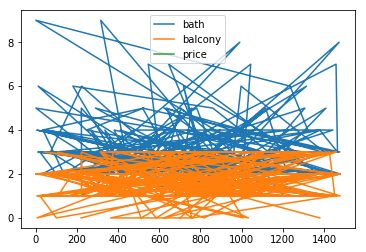

In [98]:
prices_test.sample(250).plot()

In [99]:
X_eval[col_to_norm] = X_eval[col_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [101]:
X_eval.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,0.152595,0.066667,0.666667
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,0.299562,0.533333,0.666667
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,0.205754,0.266667,0.666667
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,0.164728,0.133333,0.333333
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,0.144590,0.066667,0.333333


In [106]:
(pd.isna(X_eval)).sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
dtype: int64

In [105]:
X_eval["location"].fillna(" ", inplace = True)
X_eval["size"].fillna(" ", inplace = True)
X_eval["society"].fillna(" ", inplace = True)
X_eval["bath"].fillna((X['bath'].mean()), inplace = True)
X_eval["balcony"].fillna((X['balcony'].mean()), inplace = True)

In [107]:
predict_input_func_eval = tf.estimator.inputs.pandas_input_fn(x=X_eval,batch_size=10,num_epochs=1,shuffle=False)

In [108]:
pred_gen_eval = model.predict(predict_input_func_eval)

In [109]:
predictions_eval = list(pred_gen_eval)

INFO:tensorflow:Restoring parameters from C:\Users\Chas\AppData\Local\Temp\tmp5ddcu84z\model.ckpt-11000


In [115]:
final_pred_eval = []

for pred in predictions_eval:
    final_pred_eval.append(pred['predictions'])

In [120]:
prices_houses= pd.DataFrame({'price' : final_pred_eval})

In [149]:
price_houses =[]
for i in range(len(X_eval)):
    price_houses.append(float(final_pred_eval[i]))

In [150]:
price_houses

[97.82769012451172,
 128.15025329589844,
 94.68846130371094,
 95.75370025634766,
 88.86709594726562,
 112.73893737792969,
 127.9783706665039,
 85.89595031738281,
 103.88260650634766,
 130.37921142578125,
 109.64749908447266,
 104.82664489746094,
 121.89751434326172,
 91.17365264892578,
 119.76254272460938,
 130.7039337158203,
 72.84418487548828,
 114.98819732666016,
 101.09492492675781,
 140.5891876220703,
 95.82588195800781,
 87.50245666503906,
 92.89059448242188,
 103.2608642578125,
 110.12946319580078,
 108.27564239501953,
 102.0544662475586,
 103.75347137451172,
 121.47216796875,
 106.96674346923828,
 96.88164520263672,
 104.41960906982422,
 95.60752868652344,
 119.08447265625,
 95.47490692138672,
 99.3624267578125,
 141.1261444091797,
 94.64385223388672,
 104.44691467285156,
 84.36348724365234,
 110.95533752441406,
 137.64987182617188,
 100.77574157714844,
 96.2383041381836,
 118.26204681396484,
 94.45804595947266,
 106.94944763183594,
 111.42464447021484,
 127.45468139648438,
 11

In [154]:
prices_houses = pd.DataFrame({'price':price_houses})

In [155]:
prices_houses.head()

,price
0,97.827690
1,128.150253
2,94.688461
3,95.753700
4,88.867096


In [156]:
prices_houses.to_csv('D:\intern project\machineHack\House_prices_tensorflow.csv',index=False)